## Basis Functions

<br/>

$ \large t = y(x, w) + \epsilon $

<br />

The target variable t for observation x is given by y(x, w) plus random noise $ \epsilon $

<br />

where 

<br/>

$  \large y(x, w) = \sum \limits _{j=0} ^{M-1} w_{j} \phi _{j} (x) = w^T \phi(x)  $

<br />

Notice the sum is over the basis functions $  \phi $ which is defined for the problem with parameter M.

<br />


## Adaptive Basis Functions

The process of approximating a function to another function via basis function or NNs. The insight is that a regular NN with one hidden layer and sigmoid activations for the hidden layer is equivalent to the "Old Timey" basis function approximation (http://www.oranlooney.com/post/adaptive-basis-functions/;). The output layer of the NN is linear with no activations.



In [150]:

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
np.warnings.filterwarnings('ignore')
from scipy.optimize import minimize
import time
from matplotlib.animation import FuncAnimation
from IPython import display


## The Target function

In [151]:

def target_function(x):
    return x*(x-1) * (np.sin(13*x) + np.cos(23*x)*(1-x))



In [152]:

## The data

x = np.linspace(start=0, stop=1, num=101)
y = target_function(x) #+ np.random.normal(0, 0.1, size=x.shape)



In [153]:
print(x)
print(y)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]
[-0.         -0.01082628 -0.02225016 -0.03283344 -0.04141315 -0.04717935
 -0.04971896 -0.04902379 -0.04546401 -0.03973046 -0.03275188 -0.02559407
 -0.0193499  -0.01502884 -0.01345486 -0.01518069 -0.02042487 -0.02903637
 -0.04048941 -0.05390894 -0.0681247  -0.08175023 -0.09328091 -0.10120402
 -0.10411315 -0.1008186  -0.09044599 -0.0725162  -0.04700066 -0.0143481
  0.0245193   0.06824074  0.11508024  0.16301517  0.20984417  0.25330793
  0.29121511  0.32156582  0.34266492  0.35321833 

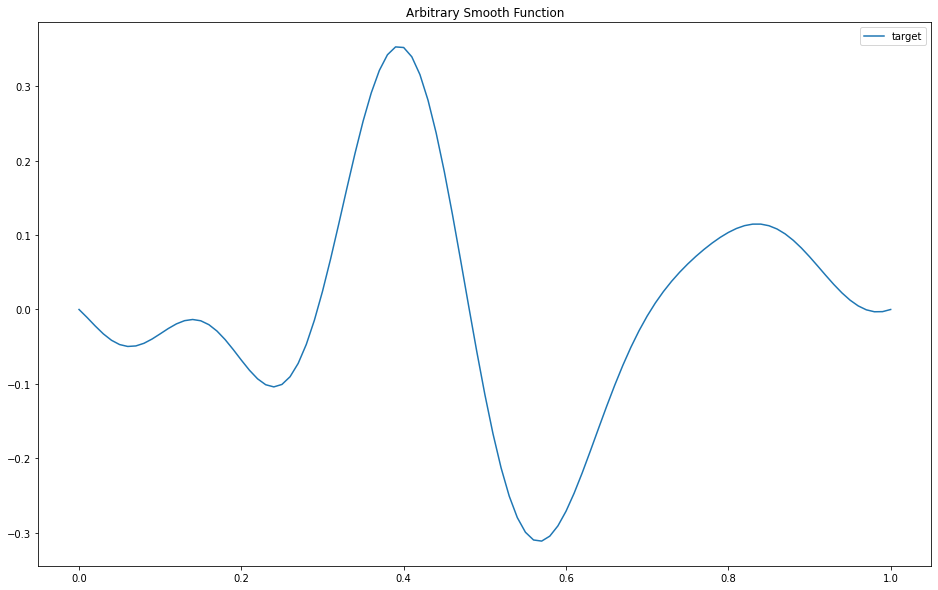

In [154]:
plt.figure(figsize=(16,10))
plt.title("Arbitrary Smooth Function")
plt.plot(x, y, label="target")
plt.legend()

## Distance metric between 2 functions

In [155]:

def square_function_distance(f, g):
    return np.sum( (f(x) - g(x))**2 )



## Step Function basis

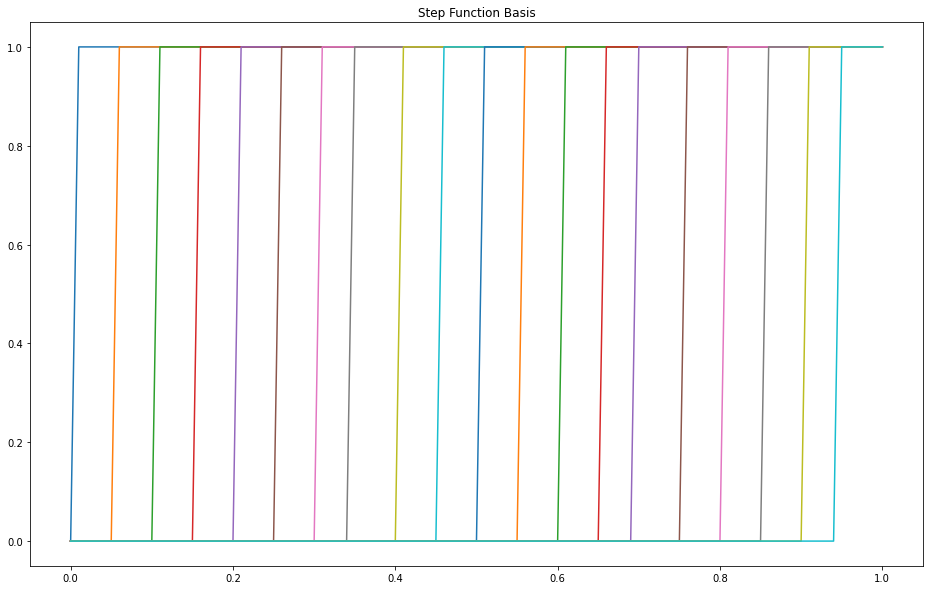

In [156]:


def step_function(i):
    return lambda x: np.where(x > i/N_step, 1, 0)
  
    
N_step = 20     ## 20


plt.figure(figsize=(16,10))
plt.title("Step Function Basis")

for i in range(N_step):
    plt.plot(x, step_function(i)(x))
  
      

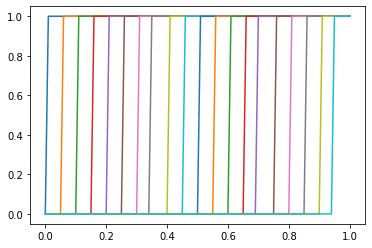

In [157]:

for i in range(N_step):
    
    plt.plot(x, step_function(i)(x))
    print(step_function(i)(x))
    display.display(plt.gcf())
    
    time.sleep(3.0)
    
    display.clear_output(wait=True)
    
    

best loss: 0.11274495922918325


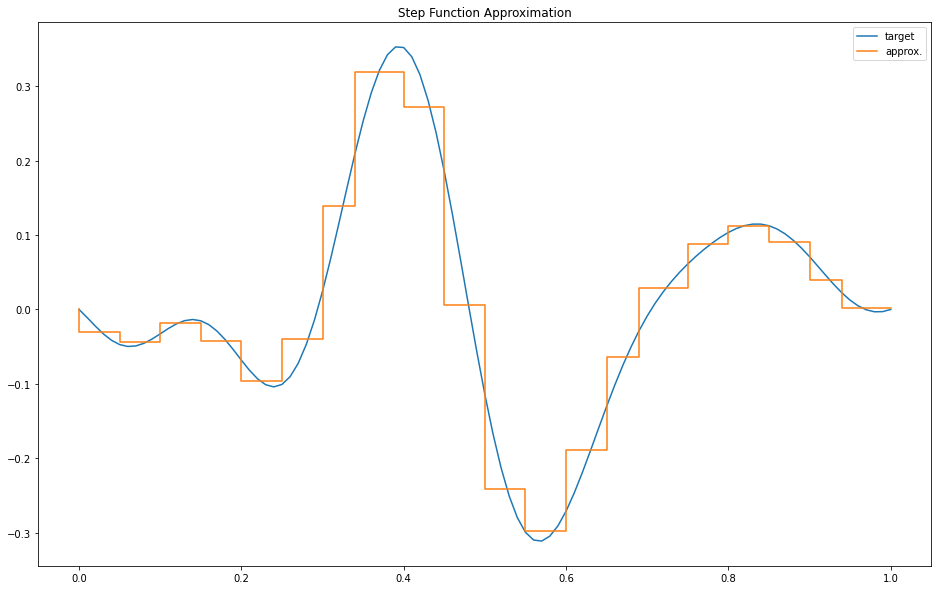

In [158]:



def sum_of_step_functions(beta):
    def f(x):
        total = np.zeros(shape=x.shape)
        for i, b in enumerate(beta):
            total += step_function(i)(x) * b
        return total
    return f            


def step_loss(beta):
    g = sum_of_step_functions(beta)
    return square_function_distance(target_function, g)

best = minimize(step_loss, x0=np.zeros(shape=N_step))
beta_hat = best.x

if best.status != 0:
    print(best.message)

plt.figure(figsize=(16,10))
plt.title("Step Function Approximation")
plt.plot(x, y, label='target')
plt.step(x, sum_of_step_functions(beta_hat)(x), label='approx.')
plt.legend()
    
print("best loss:", step_loss(beta_hat))



## Fixed Sigmoid basis function

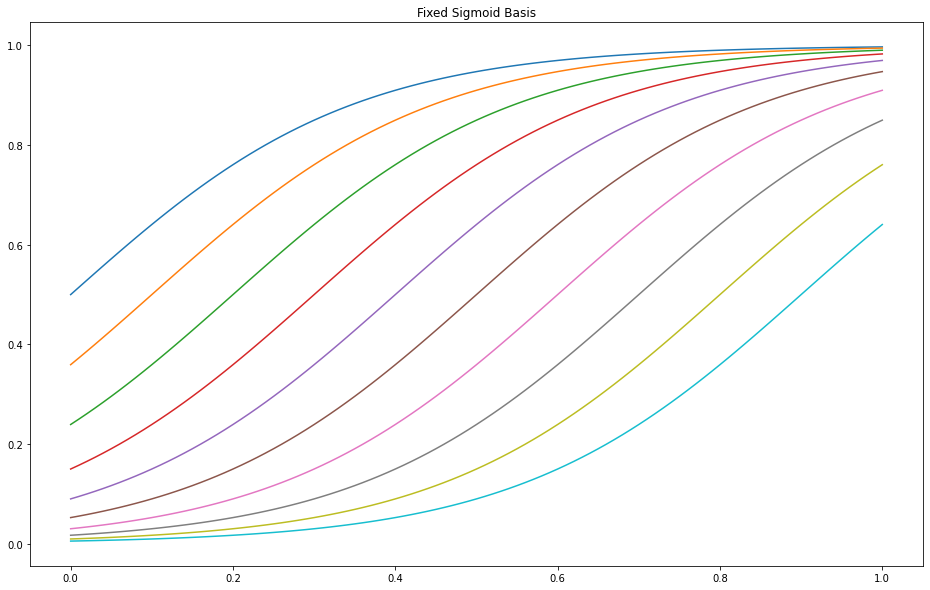

In [159]:


def sigmoid_basis_function(i):
    return lambda x: 1/(1+np.exp((i- 10*x)/1.73))


   
plt.figure(figsize=(16,10))
plt.title("Fixed Sigmoid Basis")
for i in range(10):
    plt.plot(x, sigmoid_basis_function(i)(x))



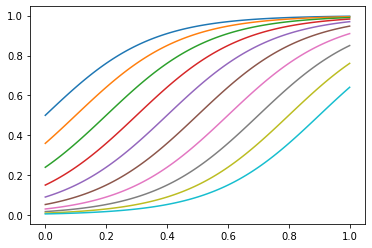

In [160]:

for i in range(10):
    plt.plot(x, sigmoid_basis_function(i)(x))


    print(sigmoid_basis_function(i)(x))
    display.display(plt.gcf())
    
    time.sleep(3.0)
    
    display.clear_output(wait=True)

Desired error not necessarily achieved due to precision loss.
best loss: 0.2856687952412168


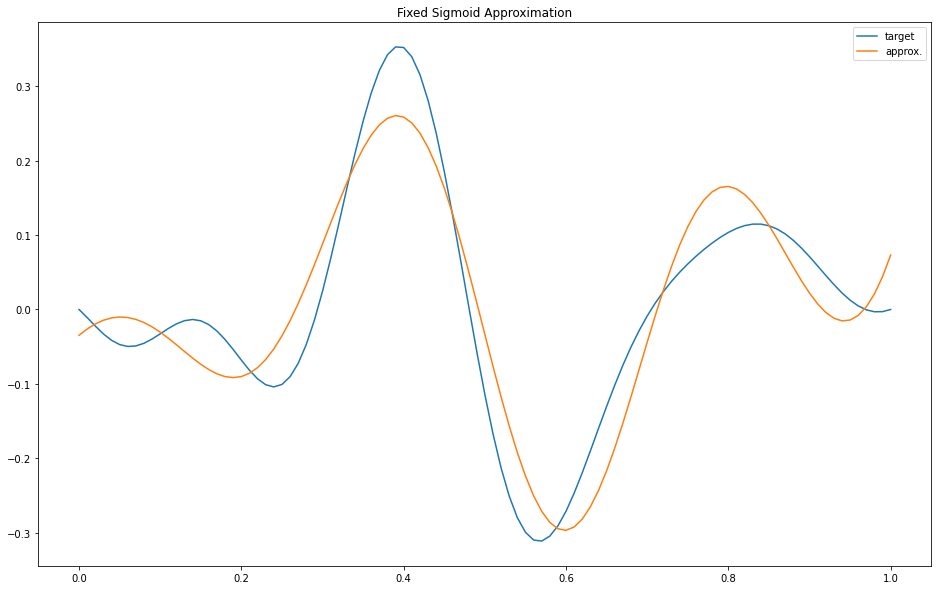

In [161]:


def sum_of_sigmoid_functions(beta):
    def f(x):
        total = np.zeros(shape=x.shape)
        for i, b in enumerate(beta):
            total += sigmoid_basis_function(i)(x) * b
        return total
    return f            

def sigmoid_loss(beta):
    g = sum_of_sigmoid_functions(beta)
    return square_function_distance(target_function, g)

best = minimize(sigmoid_loss, x0=np.zeros(shape=10))
beta_hat = best.x
if best.status != 0:
    print(best.message)

plt.figure(figsize=(16,10))
plt.title("Fixed Sigmoid Approximation")
plt.plot(x, y, label="target")
plt.plot(x, sum_of_sigmoid_functions(beta_hat)(x), label="approx.")
plt.legend()
print("best loss:", sigmoid_loss(beta_hat))



## Orthogonal Basis Functions

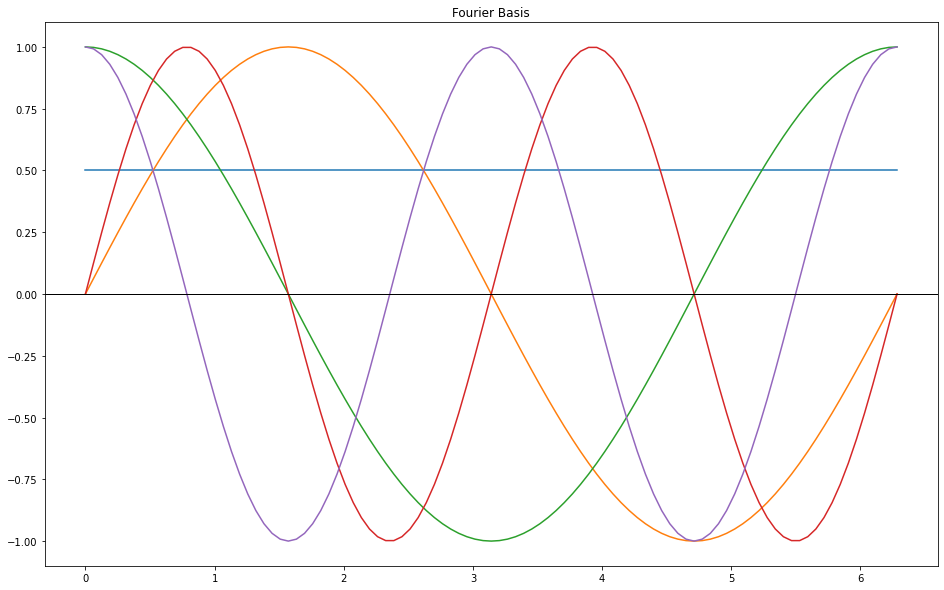

In [162]:


def fourier_basis_function(i):
    if i == 0:
        return lambda x: np.full_like(x, 0.5)
    else:
        n = (i+1)//2
        if i % 2 == 1:
            return lambda x: np.sin(n*x)
        else:
            return lambda x: np.cos(n*x)



plt.figure(figsize=(16,10))
plt.title("Fourier Basis")
for i in range(5):
    theta = x * 2 * math.pi
    plt.plot(theta, fourier_basis_function(i)(theta))
plt.axhline(y=0, color='k', linewidth=1)



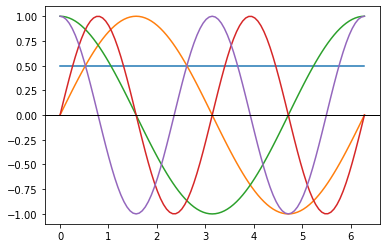

In [163]:
for i in range(5):
    theta = x * 2 * math.pi
    plt.plot(theta, fourier_basis_function(i)(theta))
    print(fourier_basis_function(i)(theta))
    display.display(plt.gcf())
    
    time.sleep(3.0)
    
    display.clear_output(wait=True)
    
    
    
plt.axhline(y=0, color='k', linewidth=1)

Desired error not necessarily achieved due to precision loss.
best loss: 0.22557310201311817


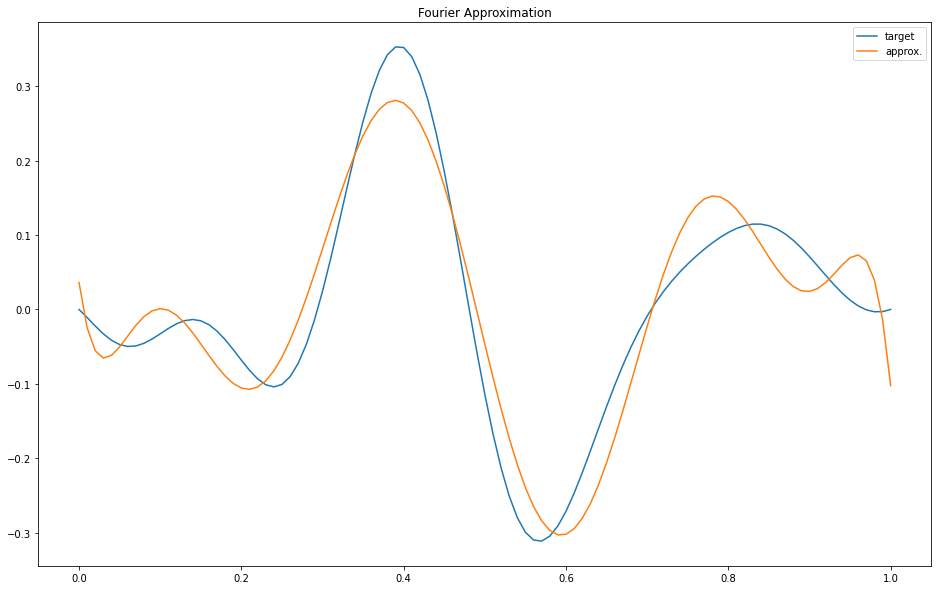

In [164]:


def sum_of_fourier_functions(beta):
    def f(x):
        total = np.zeros(shape=x.shape)
        for i, b in enumerate(beta):
            total += fourier_basis_function(i)(x) * b
        return total
    return f

def fourier_loss(beta):
    g = sum_of_fourier_functions(beta)
    return square_function_distance(target_function, g)

best = minimize(fourier_loss, x0=np.zeros(shape=21))
beta_hat = best.x
if best.status != 0:
    print(best.message)

plt.figure(figsize=(16,10))
plt.title("Fourier Approximation")
## plt.plot(x, plt.figure(figsize=(16,10))
## plt.title("Fourier Approximation")
plt.plot(x, y, label="target")
plt.plot(x, sum_of_fourier_functions(beta_hat)(x), label="approx.")
plt.legend()
print("best loss:", fourier_loss(beta_hat))






## Adaptive Basis Functions

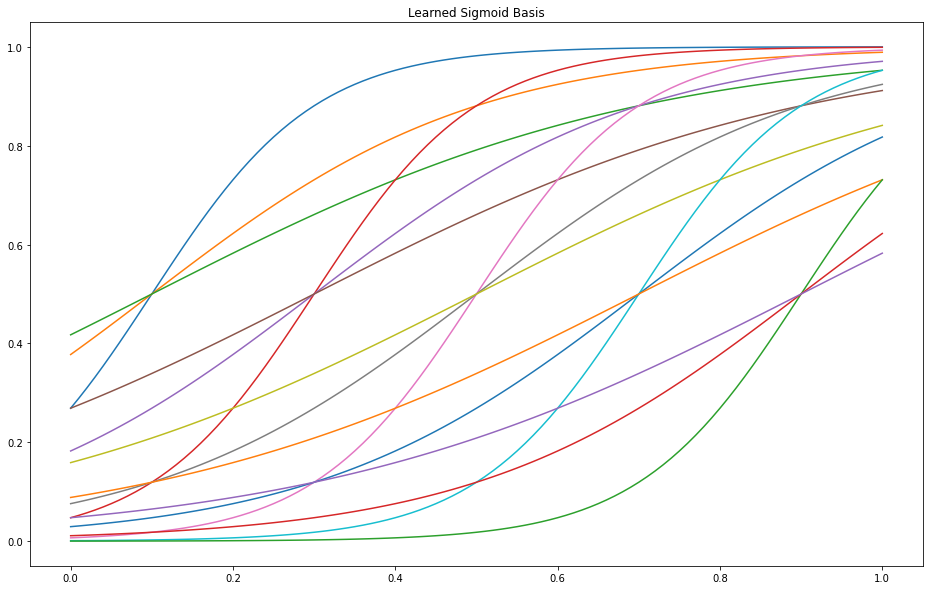

In [165]:


def learned_basis_function(bias, width):
    return lambda x: 1/(1+np.exp((bias - x)/width))

def sum_of_learned_functions(beta):
    beta = beta.reshape( (beta.size//3,3) )
    def f(x):
        total = np.zeros(shape=x.shape)
        for i, b in enumerate(beta):
            total += learned_basis_function(b[1], b[2])(x) * b[0]
        return total
    return f            

def learned_basis_loss(beta):
    g = sum_of_learned_functions(beta)
    return square_function_distance(target_function, g)

plt.figure(figsize=(16,10))
plt.title("Learned Sigmoid Basis")
for i in [1, 3, 5, 7, 9]:
    bias = i/10
    for width in [0.1, 0.2, 0.3]:
        plt.plot(x, learned_basis_function(bias, width)(x))




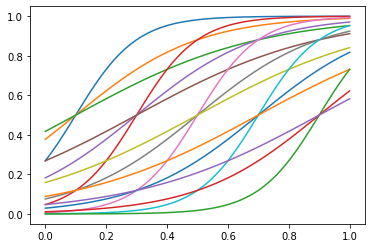

In [166]:
for i in [1, 3, 5, 7, 9]:
    bias = i/10
    for width in [0.1, 0.2, 0.3]:
        plt.plot(x, learned_basis_function(bias, width)(x))
        print(learned_basis_function(bias, width)(x))
        display.display(plt.gcf())
    
        time.sleep(3.0)
    
        display.clear_output(wait=True)
    

In [167]:


k = 7
best_loss = float('inf')
beta_hat = np.zeros( shape=(k, 3) )
for iteration in range(10):
    beta_zero = np.random.normal(0, 0.01, size=(k,3))
    beta_zero[:, 1] = np.linspace(0, 1, k)
    beta_zero[:, 2] = np.ones(shape=k) * 0.2
    print('fitting attempt', iteration)
    best = minimize(learned_basis_loss, x0=beta_zero)
    candidate_beta = best.x.reshape( (k,3) )
    candidate_loss = learned_basis_loss(candidate_beta)
    if candidate_loss < best_loss:
        best_loss = candidate_loss
        beta_hat = candidate_beta

print('beta:', beta_hat)
print("best loss:", learned_basis_loss(beta_hat))
if best.status != 0:
    print(best.message)



fitting attempt 0
fitting attempt 1
fitting attempt 2
fitting attempt 3
fitting attempt 4
fitting attempt 5
fitting attempt 6
fitting attempt 7
fitting attempt 8
fitting attempt 9
beta: [[-1.70968104 -0.67096649  8.19762486]
 [ 1.9597943   0.34398923  0.04066356]
 [ 3.60072591  1.12410069  0.28865763]
 [-4.09376085  0.4383091   0.09510014]
 [-0.98847273  0.92427585  0.05768477]
 [ 0.99779745  0.6064171   0.04235671]
 [ 2.13562992  0.40272741  0.85370212]]
best loss: 0.010696435675607916
Desired error not necessarily achieved due to precision loss.


best loss: 0.010696435675607916


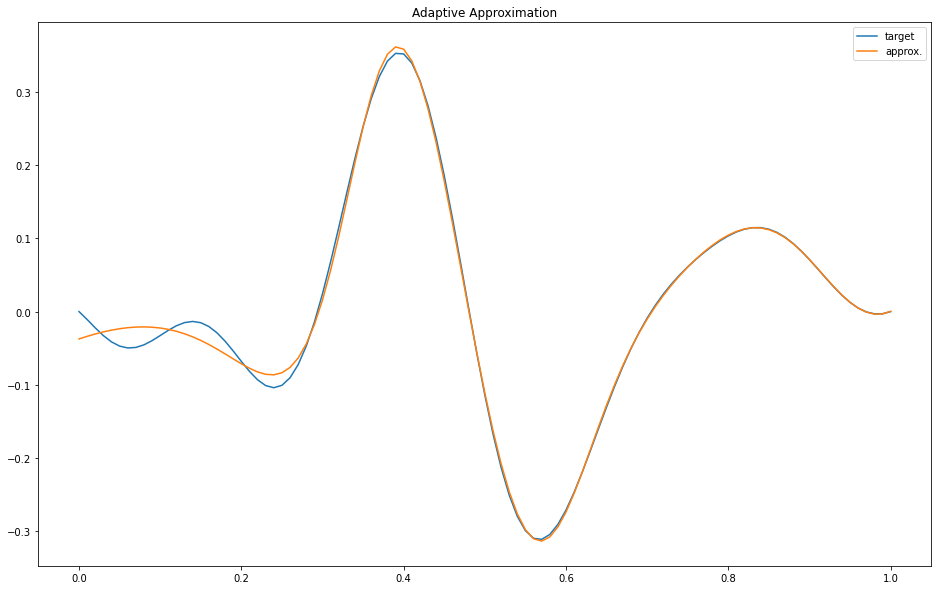

In [168]:


plt.figure(figsize=(16,10))
plt.title("Adaptive Approximation")
## plt.plot(x, yplt.figure(figsize=(16,10))
plt.plot(x, y, label="target")

plt.plot(x, sum_of_learned_functions(beta_hat)(x), label="approx.")

plt.legend()
print("best loss:", learned_basis_loss(beta_hat))

